In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#make grid for vectors
lims = [-10,10]
dim = 20

x,y = np.meshgrid(np.linspace(lims[0],lims[1],dim),np.linspace(lims[0],lims[1],dim))

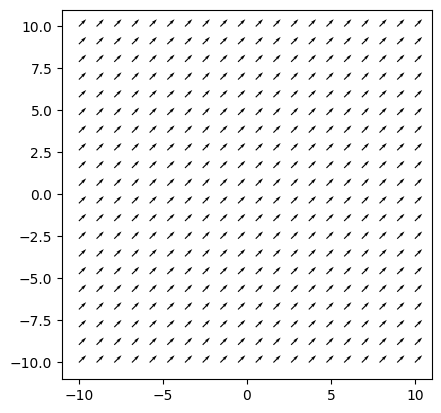

In [3]:
# Vector Field <1,1>
def field_function(x,y):
    return 1,1
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

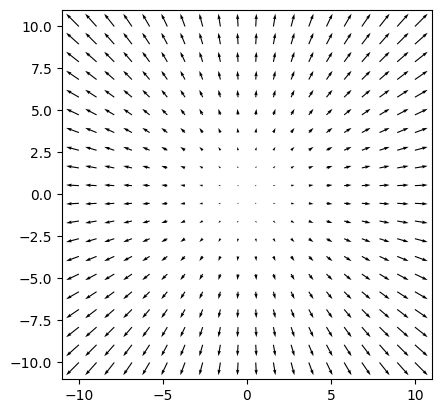

In [4]:
# vector field <x,y>
def field_function(x,y):
    return x,y
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

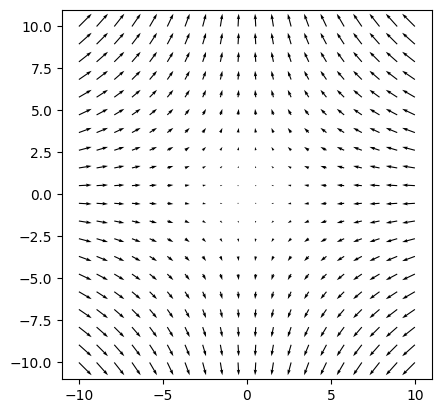

In [5]:
# vector field <-x,y>
def field_function(x,y):
    return -x,y
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

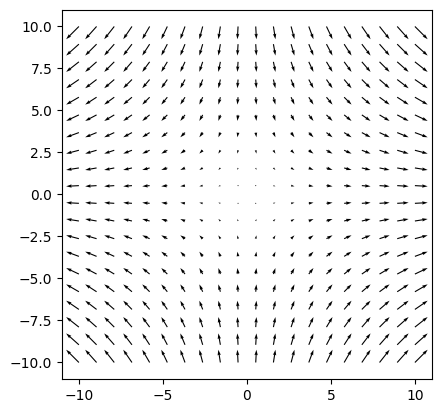

In [6]:
# vector field <x,-y>
def field_function(x,y):
    return x,-y
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

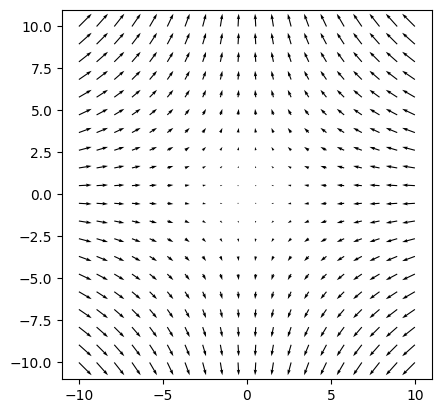

In [7]:
# vector field <-x,-y>
def field_function(x,y):
    return -x,y
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

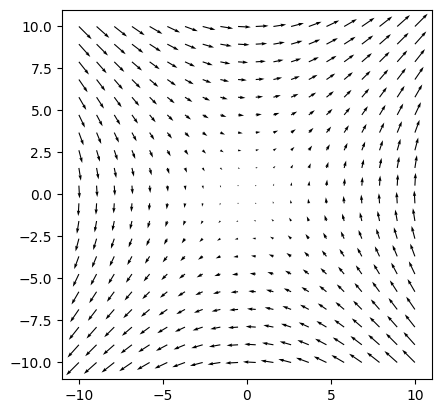

In [8]:
# vector field <y,x>
def field_function(x,y):
    return y,x
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

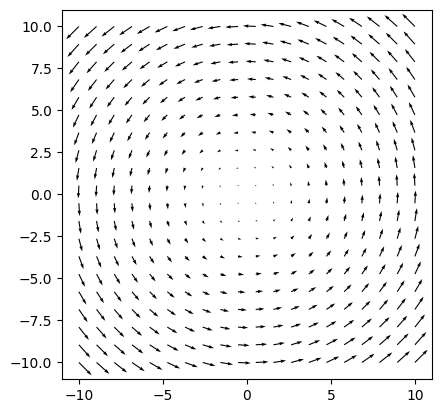

In [9]:
# vector field <-y,x>
def field_function(x,y):
    return -y,x
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

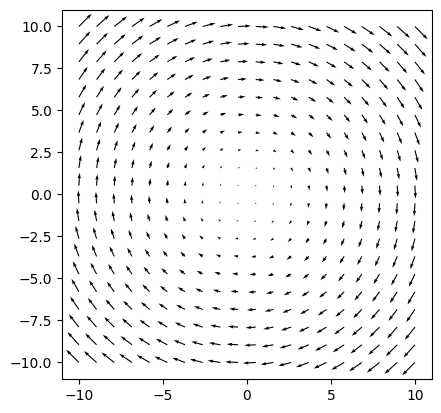

In [10]:
# vector field <y,-x>
def field_function(x,y):
    return y,-x
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

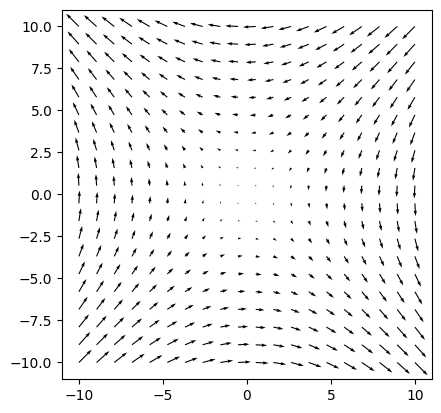

In [11]:
# vector field <-y,-x>
def field_function(x,y):
    return -y,-x
u,v = field_function(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [12]:
#basic forward Euler
def forward_euler(deriv_func, x, y, dt):
    delta = deriv_func(x,y)
    return x + delta[0] * dt, y + delta[1] * dt

In [13]:
# Euler's midpoint method
def RK2(deriv_function, x, y, dt):
    f1_x,f1_y = deriv_function(x,y)
    f2_x, f2_y = deriv_function(x+dt*f1_x/2,y+dt*f1_y/2)
    return x + f2_x*dt, y+f2_y*dt

In [14]:
# RK4 method for 2D function
def RK4(deriv_function, x, y, dt):
    f1_x, f1_y = deriv_function(x,y)
    f2_x, f2_y = deriv_function(x+dt*f1_x/2,y+dt*f1_y/2)
    f3_x, f3_y = deriv_function(x+dt*f2_x/2,y+dt*f2_y/2)
    f4_x, f4_y = deriv_function(x+dt*f3_x,y+dt*f3_y)
    new_x = x + dt/6 * (f1_x + 2*f2_x + 2 * f3_x + f4_x)
    new_y = y + dt/6 * (f1_y + 2*f2_y + 2 * f3_y + f4_y)
    return new_x, new_y
    

In [15]:
def clockwise_field(x,y):
    return y,-x

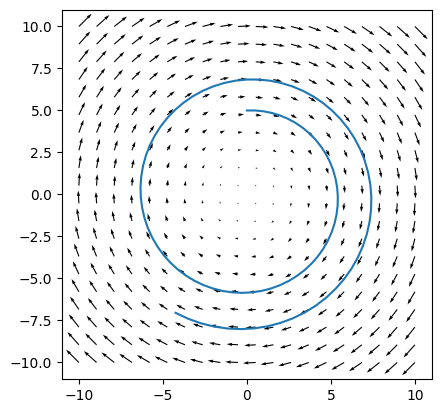

In [16]:
#Forward Euler Simulation
#define simulation
timestep = 0.1
stop_time = 10
sim_time = np.arange(0,stop_time,timestep)
state = [0,5]
func_evals = 0

#define outputs
x_out_fe = [state[0]]
y_out_fe = [state[1]]

# Run simulation
for t in sim_time:
    state = forward_euler(clockwise_field,state[0],state[1],timestep)
    
    func_evals += 1
    
    x_out_fe.append(state[0])
    y_out_fe.append(state[1])
    
# plot output
plt.plot(x_out_fe,y_out_fe)
u,v = clockwise_field(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [17]:
func_evals

100

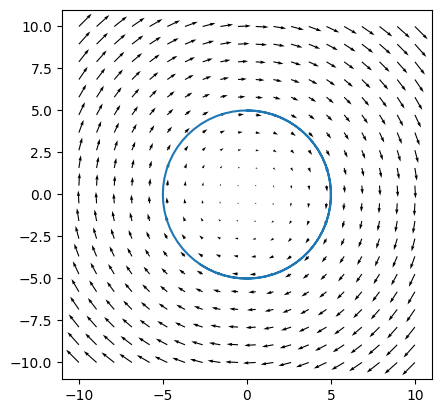

In [18]:
#RK2 Simulation
#define simulation
timestep = 0.1
stop_time = 10
sim_time = np.arange(0,stop_time,timestep)
state = [0,5]
func_evals = 0

#define outputs
x_out_rk2 = [state[0]]
y_out_rk2 = [state[1]]

# Run simulation
for t in sim_time:
    state = RK2(clockwise_field,state[0],state[1],timestep)
    
    func_evals += 2 # 2 evaluations for each RK2 call
    
    x_out_rk2.append(state[0])
    y_out_rk2.append(state[1])
    
# plot output
plt.plot(x_out_rk2,y_out_rk2)
u,v = clockwise_field(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [19]:
func_evals

200

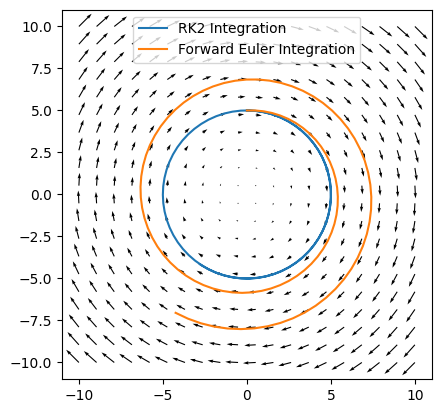

In [20]:
#Compare forward euler with rK2
plt.plot(x_out_rk2,y_out_rk2)
plt.plot(x_out_fe,y_out_fe)
u,v = clockwise_field(x,y)
plt.quiver(x,y,u,v)
plt.legend(['RK2 Integration','Forward Euler Integration'])
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [21]:
# find the error of the approximations by taking the L2 norm of the vector
def norm_error(expected, time, x, y):
    error = []
    for i in range(len(time)):
        norm = np.sqrt(x[i]**2 + y[i]**2)
        error.append(np.abs(norm-expected))
    return error

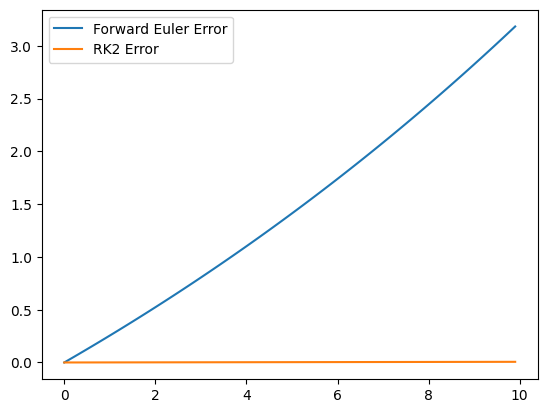

In [22]:
#show plot of error
radius = 5

error_fe = norm_error(radius, sim_time,x_out_fe, y_out_fe)
error_rk2 = norm_error(radius, sim_time, x_out_rk2, y_out_rk2)

plt.plot(sim_time,error_fe)
plt.plot(sim_time,error_rk2)
plt.legend(['Forward Euler Error', 'RK2 Error'])
plt.show()

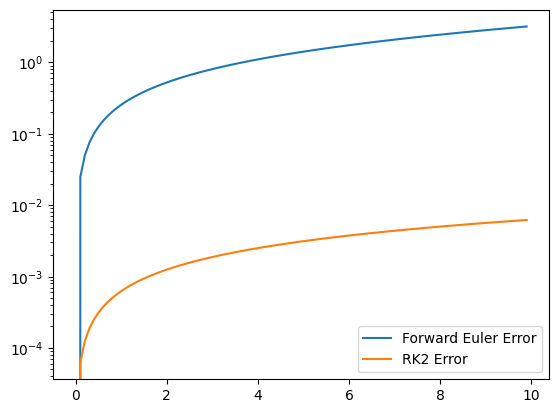

In [23]:
#show log plots of error
radius = 5

error_fe = norm_error(radius, sim_time,x_out_fe, y_out_fe)
error_rk2 = norm_error(radius, sim_time, x_out_rk2, y_out_rk2)

plt.plot(sim_time,error_fe)
plt.plot(sim_time,error_rk2)
plt.yscale('log')
plt.legend(['Forward Euler Error', 'RK2 Error'])
plt.show()

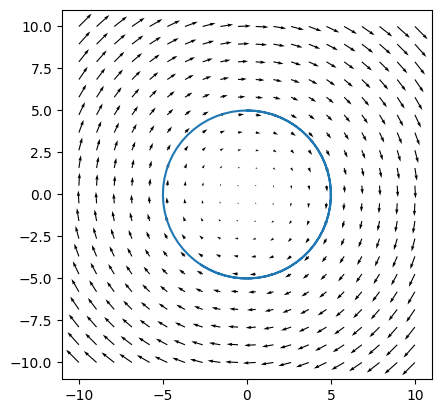

In [24]:
#RK4 Simulation
#define simulation
timestep = 0.1
stop_time = 10
sim_time = np.arange(0,stop_time,timestep)
state = [0,5]
func_evals = 0

#define outputs
x_out_rk4 = [state[0]]
y_out_rk4 = [state[1]]

# Run simulation
for t in sim_time:
    state = RK4(clockwise_field,state[0],state[1],timestep)
    
    func_evals += 4 # 4 function evaluations in RK4
    
    x_out_rk4.append(state[0])
    y_out_rk4.append(state[1])
    
# plot output
plt.plot(x_out_rk4,y_out_rk4)
u,v = clockwise_field(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [25]:
func_evals

400

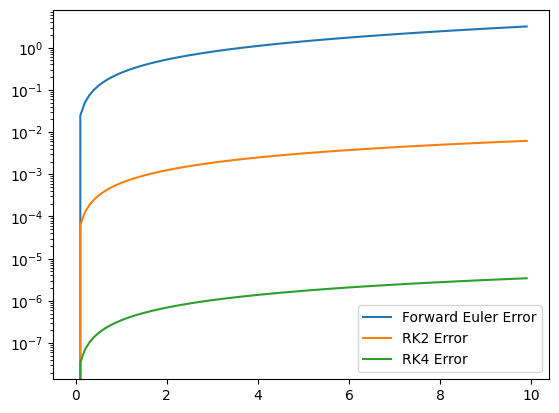

In [26]:
#show plot of error
radius = 5

error_fe = norm_error(radius, sim_time,x_out_fe, y_out_fe)
error_rk2 = norm_error(radius, sim_time, x_out_rk2, y_out_rk2)
error_rk4 = norm_error(radius, sim_time, x_out_rk4, y_out_rk4)

plt.plot(sim_time,error_fe)
plt.plot(sim_time,error_rk2)
plt.plot(sim_time,error_rk4)
plt.yscale('log')
plt.legend(['Forward Euler Error', 'RK2 Error','RK4 Error'])
plt.show()

In [27]:
#exponential decay function
def exp_decay(x,y):
    k = 2
    return x, -k*y

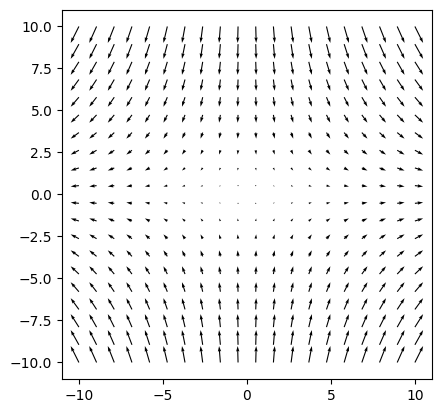

In [28]:
#Plot vector field of exponential decay function
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

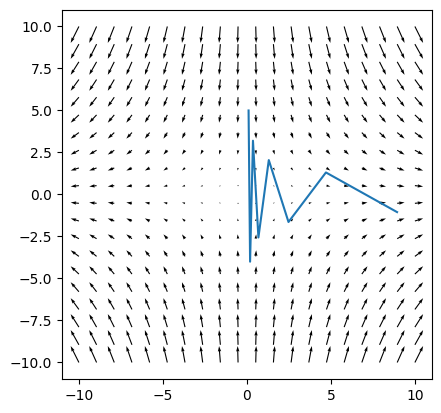

In [29]:
#Forward Euler exponential decay Simulation stepsize larger than 1/k
#define simulation
timestep = 0.9
stop_time = 6
sim_time = np.arange(0,stop_time,timestep)
state = [0.1,5]

#define outputs
x_out_fe = [state[0]]
y_out_fe = [state[1]]

# Run simulation
for t in sim_time:
    state = forward_euler(exp_decay,state[0],state[1],timestep)
    x_out_fe.append(state[0])
    y_out_fe.append(state[1])
    
# plot output
plt.plot(x_out_fe,y_out_fe)
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

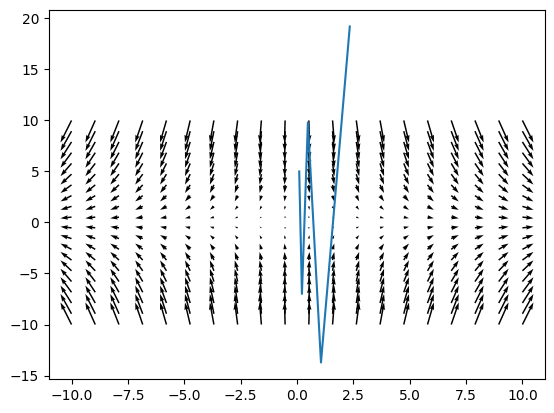

In [34]:
#Forward Euler exponential decay Simulation stepsize larger than 2/k
#define simulation
timestep = 1.2
stop_time = 4
sim_time = np.arange(0,stop_time,timestep)
state = [0.1,5]

#define outputs
x_out_fe = [state[0]]
y_out_fe = [state[1]]

# Run simulation
for t in sim_time:
    state = forward_euler(exp_decay,state[0],state[1],timestep)
    x_out_fe.append(state[0])
    y_out_fe.append(state[1])
    
# plot output
plt.plot(x_out_fe,y_out_fe)
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
plt.show()

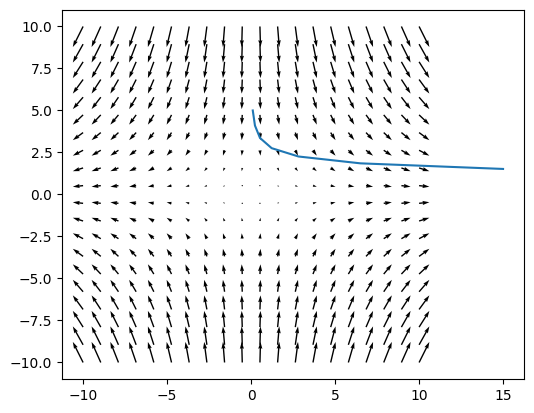

In [31]:
#RK2 exponential decay Simulation stepsize larger than 1/k
#define simulation
timestep = 0.9
stop_time = 5
sim_time = np.arange(0,stop_time,timestep)
state = [0.1,5]

#define outputs
x_out_rk2 = [state[0]]
y_out_rk2 = [state[1]]

# Run simulation
for t in sim_time:
    state = RK2(exp_decay,state[0],state[1],timestep)
    x_out_rk2.append(state[0])
    y_out_rk2.append(state[1])
    
# plot output
plt.plot(x_out_rk2,y_out_rk2)
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

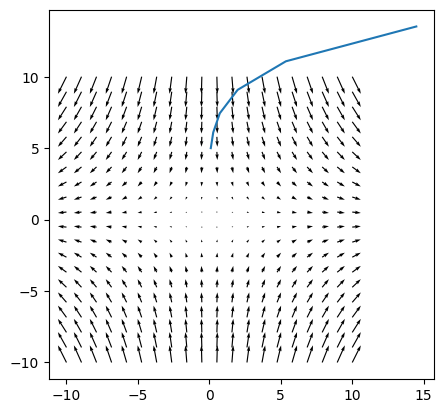

In [32]:
#RK2 Simulation stepsize larger than 2/k
#define simulation
timestep = 1.1
stop_time = 5
sim_time = np.arange(0,stop_time,timestep)
state = [0.1,5]

#define outputs
x_out_rk2 = [state[0]]
y_out_rk2 = [state[1]]

# Run simulation
for t in sim_time:
    state = RK2(exp_decay,state[0],state[1],timestep)
    x_out_rk2.append(state[0])
    y_out_rk2.append(state[1])
    
# plot output
plt.plot(x_out_rk2,y_out_rk2)
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

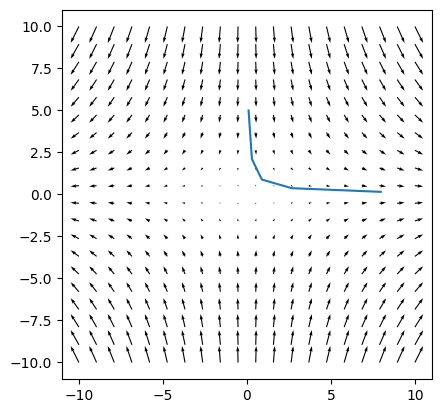

In [33]:
#RK4 Simulation stepsize larger than 2/k
#define simulation
timestep = 1.1
stop_time = 4
sim_time = np.arange(0,stop_time,timestep)
state = [0.1,5]

#define outputs
x_out_rk4 = [state[0]]
y_out_rk4 = [state[1]]

# Run simulation
for t in sim_time:
    state = RK4(exp_decay,state[0],state[1],timestep)
    x_out_rk4.append(state[0])
    y_out_rk4.append(state[1])
    
# plot output
plt.plot(x_out_rk4,y_out_rk4)
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()